In [1]:
from pathlib import Path
from PIL import Image
import random
import torch
import os
import sys
sys.path.append("../src")
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.models.detection import FasterRCNN
import torchvision.transforms as transforms
from utils.model_definitions import ConvClassifier
from utils.common_functions import get_transformations, prepare_image, predict_image, get_class_name, draw_boxes, get_faster_rcnn_model

--------------------------------- SETTING UP TEST IMAGE FOR PREDICTION -----------------------------------------

Test Image


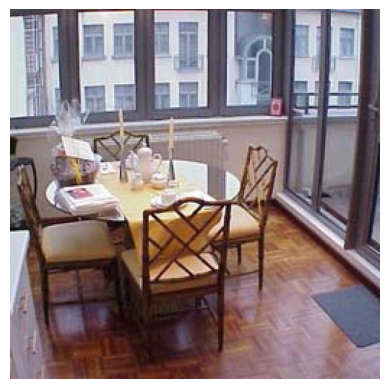

In [2]:
print("Test Image")
image_path = "../FasterRCNN/test/55mdin_jpg.rf.56d54dd7cda6a4a9b5fb9f2f3229d0a7.jpg" 
image = Image.open(image_path).convert("RGB")  # Convert to RGB to ensure compatibility
plt.imshow(image)
plt.axis("off")  # Turn off axis labels
plt.show()

In [3]:
data_dir  = '../data/Images'

classes = os.listdir(data_dir)
print(classes)
print(f"length: {len(classes)}")

dataset = ImageFolder(data_dir, transform = get_transformations())
print(f"dataset size: {len(dataset)}")

['artstudio', 'bathroom', 'bedroom', 'children_room', 'closet', 'computerroom', 'dining_room', 'gameroom', 'kitchen', 'livingroom', 'locker_room', 'meeting_room']
length: 12
dataset size: 3683


------------------------------- SCENE CLASSIFICATION STARTS --------------------------------------

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvClassifier(dataset).to(device)
optim = torch.optim.Adam(model.parameters(), 6e-5)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
model.load_state_dict(torch.load("resnet18.pth"))
model.eval()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23964\3682215615.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("resnet18.pth"))


ConvClassifier(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Predicted: dining_room


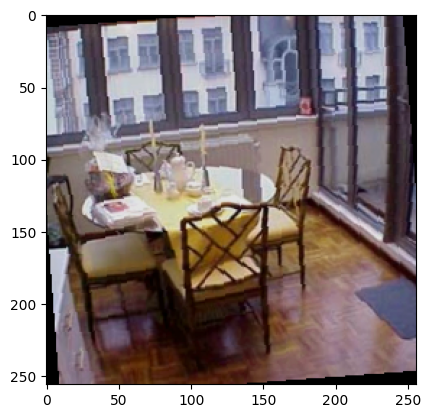

In [6]:
train_ds, val_ds, test_ds = random_split(dataset, [2800, 500, 383])

transform = get_transformations()
transformed_image = transform(image)
print(transformed_image)

# img should be input to the notebook
# img, label = test_ds[10]

plt.imshow(transformed_image.permute(1, 2, 0))
predicted_room = predict_image(transformed_image, model, device, dataset)
print('Predicted:', predicted_room)

In [7]:
room_decor = {
    "livingroom": ["Sofa", "Table", "Dining Set", "Desk", "Photo Frame", "Floor lamp", "Chair", "Vase"],
    "bedroom": ["Bed", "Desk", "Wardrobe", "Photo Frame", "Floor lamp", "Vase"],
    "kitchen": ["Kitchen shelf", "Vase"],
    "bathroom": ["Bathroom shelf"],
    "children_room": ["Bed", "Desk", "Table", "Wardrobe", "Photo Frame", "Chair"],
    "dining_room": ["Desk", "Dining Set", "Photo Frame", "Vase"]
}

--------------------------------- OBJECT DETECTION STARTS --------------------------------

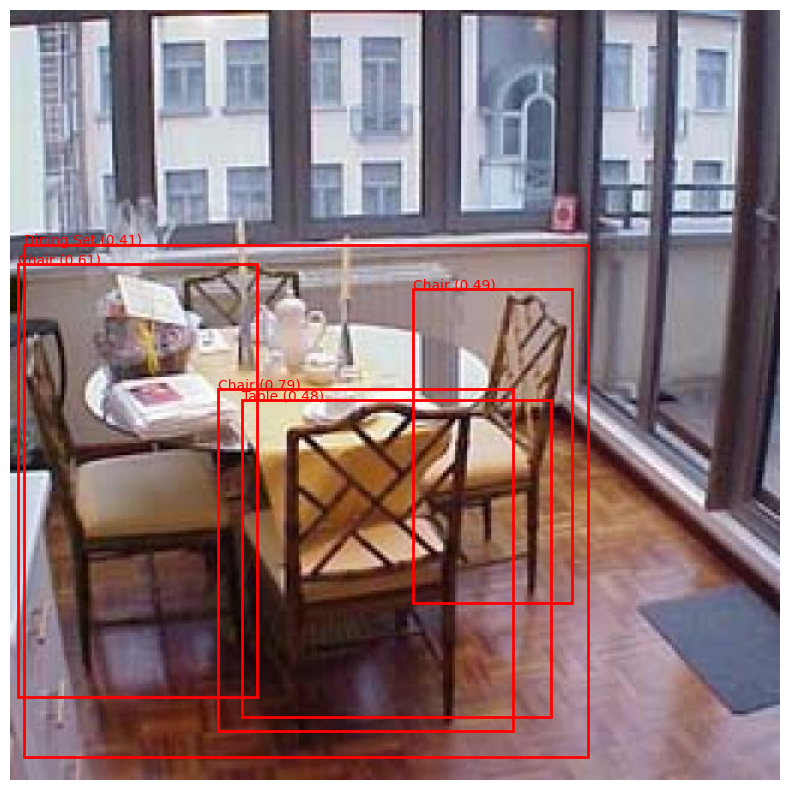

In [9]:
model = get_faster_rcnn_model("../FasterRCNN/fasterrcnn_resnet50_epoch4.pth")
    
#Load the unseen image 
image_path = "../FasterRCNN/test/55mdin_jpg.rf.56d54dd7cda6a4a9b5fb9f2f3229d0a7.jpg" 
image_tensor = prepare_image(image_path) 

with torch.no_grad(): # Disable gradient computation for inference 
    prediction = model(image_tensor)

#Display the image with bounding boxes and correct Labels 
predicted_objects = draw_boxes(Image.open(image_path), prediction, fig_size=(12, 10))

---------------------------------- DECOR RECOMMENDATION LOGIC STARTS -------------------------------

In [10]:
# predicted_objects = ["Bed", "Desk"]
total_required_objects = room_decor[predicted_room]
actual_required_objects = list(set(total_required_objects) - set(predicted_objects))
print(actual_required_objects)

['Photo Frame', 'Vase', 'Desk']


In [11]:
def get_file_count(decor_item):
    folder_path = Path(f"../scraper/ikea_images_new/{decor_item}")

    # Count the number of files
    num_files = sum(1 for f in folder_path.iterdir() if f.is_file())
    return num_files

In [12]:
for decor_item in actual_required_objects:
    num_images_decor = get_file_count(decor_item) 
    img = Image.open(f"../scraper/ikea_images_new/{decor_item}/{decor_item}_{random.randint(15, 15 + num_images_decor - 1)}.jpg")
    print(f"Recommended {decor_item}")
    img.show()

Recommended Photo Frame
Recommended Vase
Recommended Desk
